In [1]:
# recreating OECD Social Expenditure by income quintile graph (figure 5)
# http://www.oecd.org/els/soc/OECD2014-Social-Expenditure-Update-Nov2014-8pages.pdf
# and comparing 2011 and 2014

# full original data is here
# http://oe.cd/idd 

# BUT OECD sites all seem a bit iffy (so I ended up sending a begging email and they just send me the data series)

In [2]:

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

encoding = "ISO-8859-1"

import Jupyter_module_loader

In [3]:
import holoviews as hv
hv.notebook_extension()

from bqplot import (
    LogScale, LinearScale, OrdinalColorScale, ColorAxis,
    Axis, Scatter, Lines, CATEGORY10, Label, Figure, Tooltip, Hist
)

from ipywidgets import HBox, VBox, IntSlider, Play, jslink, Layout, Dropdown
import ipywidgets
%matplotlib inline

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

ModuleNotFoundError: No module named 'bqplot'

In [5]:
# you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
    raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

BES_code_folder   = "../BES_analysis_code/" # we should be here!
BES_small_data_files = BES_code_folder + "small data files" + os.sep
if not os.path.exists( BES_small_data_files ):
    os.makedirs( BES_small_data_files )

# we should create these if they don't already exist
BES_data_folder   = "../BES_analysis_data/"
if not os.path.exists( BES_data_folder ):
    os.makedirs( BES_data_folder )

BES_output_folder = "../BES_analysis_output/"
if not os.path.exists( BES_output_folder ):
    os.makedirs( BES_output_folder )
    
BES_publications_folder = "../BES_analysis_publications/"
if not os.path.exists( BES_publications_folder ):
    os.makedirs( BES_publications_folder )

BES_publications_OECD_SE = BES_publications_folder + os.sep + "OECD_Social_Expenditure" + os.sep
if not os.path.exists( BES_publications_OECD_SE ):
    os.makedirs( BES_publications_OECD_SE )    
    
BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

In [26]:
OECD_data_files = BES_small_data_files + os.sep + "Other_datasets"+ os.sep + "OECD_Social_Expenditure" + os.sep

In [107]:
SE_2011 = pd.read_csv(OECD_data_files+"IDD-share-transfers-2011.csv")
SE_2014 = pd.read_csv(OECD_data_files+"IDD-share-transfers-2014.csv")

In [108]:
state_label = "OECD States"
quintile_label = "Recipient Disposable Income Quintiles"
share_label = "%Share of Public Social Benefits"
quintile_label_list = ['Q1 (Lowest Fifth)',"Q2","Q3","Q4",'Q5 (Highest Fifth)']

# Good distinct colours!: Red, Orange, Yellow, Green, Blue
palette = {quintile_label_list[0]: "Blue",
           quintile_label_list[1]: "Green",
           quintile_label_list[2]: "Yellow",
           quintile_label_list[3]: "Orange",
           quintile_label_list[4]: "Red"    }


In [109]:
SE_2011.columns = [state_label]+quintile_label_list
SE_2014.columns = [state_label]+quintile_label_list

In [110]:
SE_2011.loc[SE_2011[state_label]=="OECD",state_label] = "OECD Mean"
SE_2014.loc[SE_2014[state_label]=="OECD",state_label] = "OECD Mean"

In [111]:
set(SE_2011[state_label].values).symmetric_difference(set(SE_2014[state_label].values))
# Latvia in 2014 dataset, but not 2011

SE_2014 = SE_2014.drop( SE_2014[ SE_2014[state_label]=="Latvia" ].index ).reset_index(drop=True)

# Quintiles by Equivalised Disposable Income

In [112]:
# make sure all shares add up to 100%

SE_2011[quintile_label_list] = 100*SE_2011[quintile_label_list].apply(lambda x: x/SE_2011[quintile_label_list].sum(axis=1))
SE_2014[quintile_label_list] = 100*SE_2014[quintile_label_list].apply(lambda x: x/SE_2014[quintile_label_list].sum(axis=1))


In [113]:
SE_sum = SE_2014.copy()

SE_sum[quintile_label_list] = SE_2014[quintile_label_list] + SE_2011[quintile_label_list]
SE_sum["Q5-Q1"] = SE_sum[quintile_label_list[-1]] - SE_sum[quintile_label_list[0]]

sorted_States = SE_sum.sort_values(by="Q5-Q1",ascending=True)[ state_label ]

In [114]:
# order all states by 2011 Q5 values

SE_2011[state_label] = SE_2011[state_label].astype('category').cat.reorder_categories(sorted_States, ordered=True)
SE_2014[state_label] = SE_2014[state_label].astype('category').cat.reorder_categories(sorted_States, ordered=True)

SE_2011 = SE_2011.sort_values(by=state_label,ascending=True)
SE_2014 = SE_2014.sort_values(by=state_label,ascending=True)

data_by_year = {"2011":SE_2011, "2014":SE_2014}

In [18]:
def flatten_df(data_by_year, year, quintile_label_list, show_all_quintiles, share_label):
    # data_by_year: dictionary of datasets by year
    # year str "2011"/"2014"

    if year == "difference":
        SE_df = data_by_year["2011"].copy()
        SE_df[quintile_label_list] = data_by_year["2014"][quintile_label_list] - data_by_year["2011"][quintile_label_list]        
        title = "Change from 2011 to 2014- " + share_label
    else:
        SE_df = data_by_year[year].copy()
        title = year + "- " + share_label

    
    if show_all_quintiles:
        drop_list = []
        title = title + " paid to people in all income quintiles"
    else:
        drop_list = quintile_label_list[1:-1]
        title = title + " paid to people with lowest and highest income quintiles"
    
    SE_flat = SE_df.drop(drop_list,axis=1)
    SE_flat.index = SE_flat[state_label]
    SE_flat = SE_flat.drop(state_label,axis=1).stack().reset_index()
    SE_flat.columns = [state_label, quintile_label, share_label]
    return (SE_flat , title )

In [132]:
def annotate(ax, title, year):
    plt.title(title)
    plt.xticks(rotation=90)
    if not relative_to_GDP:
        if year == "difference":
            ax.axhline(y=0,  xmin=0, xmax=1, alpha=.5, dashes=[5, 5], color='grey')
        else:
            ax.axhline(y=20, xmin=0, xmax=1, alpha=.5, dashes=[5, 5], color='grey')
            plt.ylim(0, 60)
    else:
        plt.ylim(0, 20)
        
        
    note_annotation = "Notes: "+quintile_label+"(Equivalised)"+", "+share_label+"(Paid in cash)"+"\n"\
        "Total population, States ordered by increasing Q5 (average of 2011 and 2014)"
    ax.annotate(note_annotation, (0,0), (0, -105),
                     xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 8) 

    source_annotation = "Source: Data from OECD Income Distribution database, via http://oe.cd/idd"
    ax.annotate(source_annotation, (0,0), (0, -130),
                     xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 8) 

In [20]:
def plot_script():

    data , title = flatten_df(data_by_year, year, quintile_label_list, show_all_quintiles, share_label)
    f, ax = plt.subplots(figsize=figsize)
    ax = plot_fn( ax=ax, x=state_label, y=share_label, hue=quintile_label, data=data, palette = palette )
    annotate(ax,title=title,year=year)
    f.savefig( BES_publications_OECD_SE+title+".png", bbox_inches='tight' )

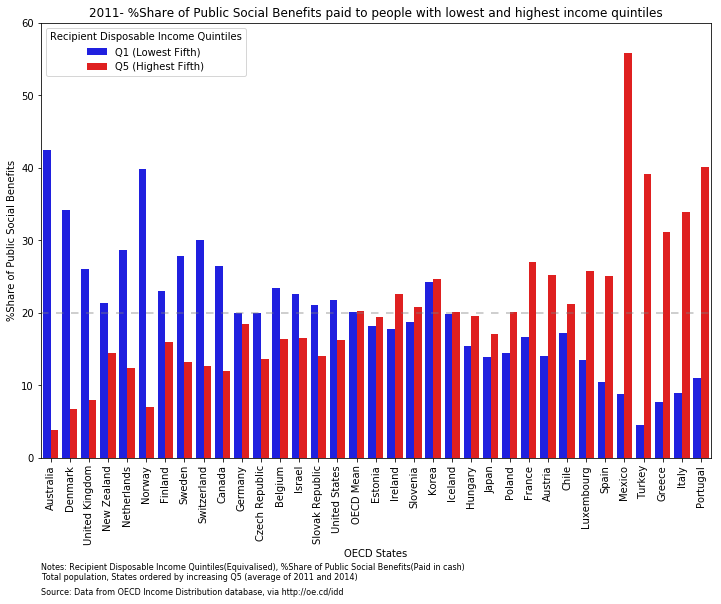

In [507]:
year = "2011"
show_all_quintiles = False
diff = False
figsize = (12,8)
plot_fn = sns.barplot

plot_script()

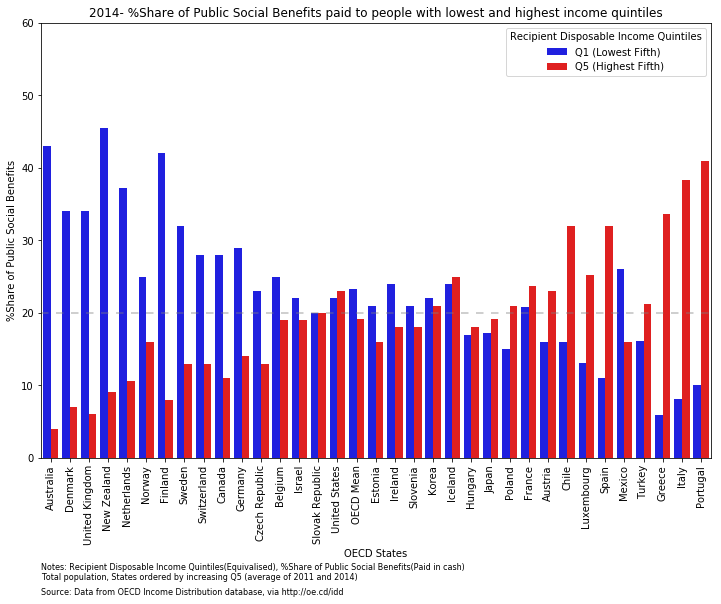

In [508]:
year = "2014"
show_all_quintiles = False
diff = False
figsize = (12,8)
plot_fn = sns.barplot

plot_script()

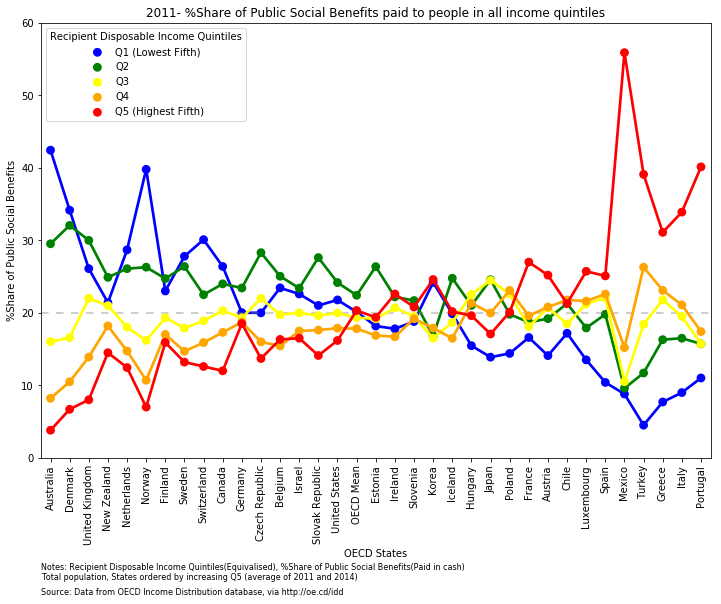

In [509]:
year = "2011"
show_all_quintiles = True
diff = False
figsize = (12,8)
plot_fn = sns.pointplot

plot_script()

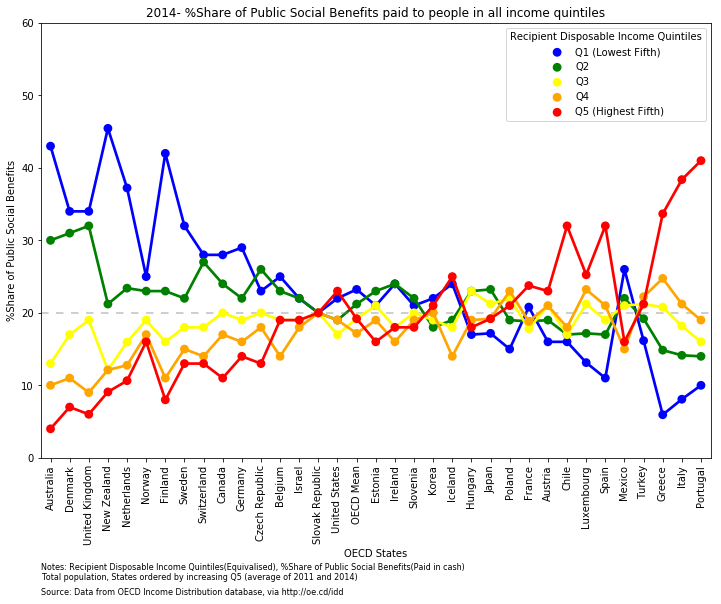

In [510]:
year = "2014"
show_all_quintiles = True
diff = False
figsize = (12,8)
plot_fn = sns.pointplot

plot_script()

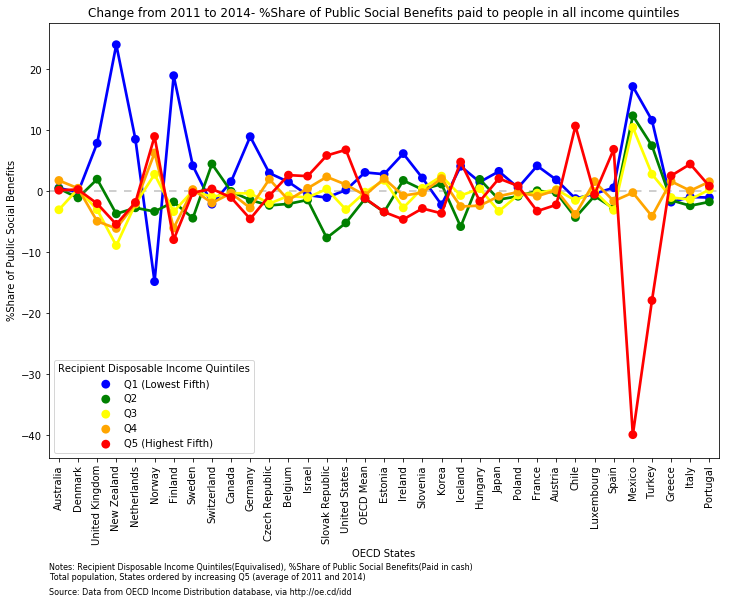

In [511]:
year = "difference"
show_all_quintiles = True
diff = False
figsize = (12,8)
plot_fn = sns.pointplot

plot_script()

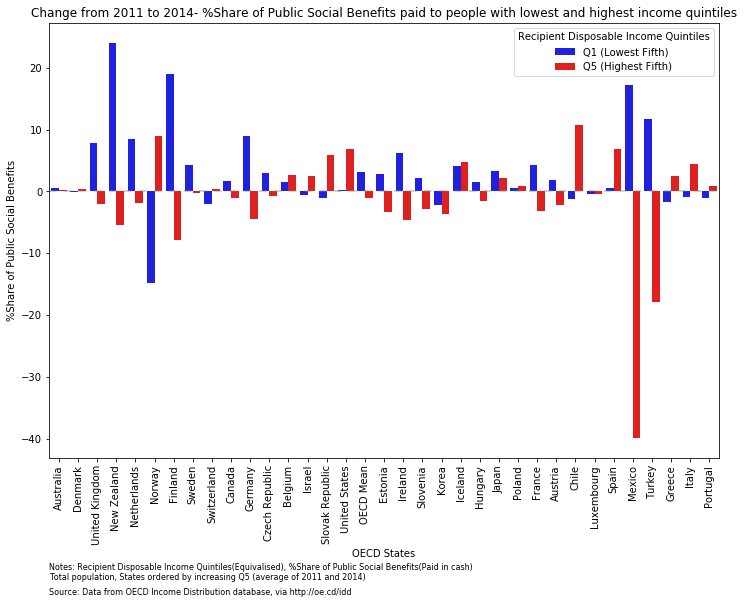

In [512]:
year = "difference"
show_all_quintiles = False
diff = False
figsize = (12,8)
plot_fn = sns.barplot

plot_script()


In [ ]:
################################################################################################
# MAYBE WHAT WE'RE SEEING IS THE NECESSARY "BRIBE" TO THE BETTER OFF TO GIVE MORE TO THE POORER?
# E.G. IF WE REWEIGHT TO %GDP RATHER THAN JUST WHAT IS SPENT ON PUBLIC SOCIAL SPENDING WE GET A DIFFERENT PICTURE?

In [23]:
data_by_year

{'2011':         OECD States  Q1 (Lowest Fifth)         Q2         Q3         Q4  \
 0         Australia          42.442442  29.529530  16.016016   8.208208   
 6           Denmark          34.165834  32.067932  16.583417  10.489510   
 32   United Kingdom          26.100000  30.000000  22.000000  13.900000   
 22      New Zealand          21.400000  24.900000  21.000000  18.200000   
 21      Netherlands          28.685259  26.095618  18.027888  14.741036   
 23           Norway          39.800000  26.300000  16.200000  10.700000   
 8           Finland          23.023023  24.724725  19.319319  17.017017   
 29           Sweden          27.800000  26.400000  17.900000  14.700000   
 30      Switzerland          30.100000  22.500000  18.900000  15.900000   
 3            Canada          26.400000  24.000000  20.300000  17.300000   
 10          Germany          20.020020  23.423423  19.319319  18.718719   
 5    Czech Republic          20.000000  28.300000  22.000000  16.000000   
 2  

In [53]:
from utility import *
PublicSpendingGDPFraction = pd.read_csv(OECD_data_files+"PublicSpendingGDPFraction.csv")
PublicSpendingGDPFraction.loc[34] = ["OECD Mean","OECD-34",PublicSpendingGDPFraction["2014"].mean(),
                                     "OECD Mean",PublicSpendingGDPFraction["2011"].mean()]

In [56]:
# PublicSpendingGDPFraction.loc[ 
data_by_year["2011"]["OECD States"].values 

[Australia, Denmark, United Kingdom, New Zealand, Netherlands, ..., Mexico, Turkey, Greece, Italy, Portugal]
Length: 35
Categories (35, object): [Australia < Denmark < United Kingdom < New Zealand ... Turkey < Greece < Italy < Portugal]

In [62]:
PublicSpendingGDPFraction = PublicSpendingGDPFraction.set_index("Country").reindex(data_by_year["2011"]["OECD States"])
# why does it appear to be rounding?

array([17.8       , 30.1       , 22.7       , 20.7       , 23.5       ,
       21.8       , 28.3       , 27.2       , 19.3       , 17.4       ,
       25.5       , 20.1       , 29.4       , 15.2       , 18.1       ,
       19.        , 21.41470588, 16.8       , 22.3       , 24.        ,
        9.        , 18.1       , 22.6       , 23.1       , 20.1       ,
       31.        , 27.7       , 10.1       , 22.5       , 26.8       ,
        7.7       , 12.2       , 25.7       , 27.5       , 24.8       ])

In [92]:

data_by_year["2011"][quintile_columns].multiply(PublicSpendingGDPFraction["2011"]/100, axis=0)

,Q1 (Lowest Fifth),Q2,Q3,Q4,Q5 (Highest Fifth)
0,42.442442,29.529530,16.016016,8.208208,3.803804
6,34.165834,32.067932,16.583417,10.489510,6.693307
32,26.100000,30.000000,22.000000,13.900000,8.000000
22,21.400000,24.900000,21.000000,18.200000,14.500000
21,28.685259,26.095618,18.027888,14.741036,12.450199
23,39.800000,26.300000,16.200000,10.700000,7.000000
8,23.023023,24.724725,19.319319,17.017017,15.915916
29,27.800000,26.400000,17.900000,14.700000,13.200000
30,30.100000,22.500000,18.900000,15.900000,12.600000
3,26.400000,24.000000,20.300000,17.300000,12.000000


In [116]:
data_by_year["2011"] = data_by_year["2011"].set_index("OECD States").multiply(PublicSpendingGDPFraction["2011"]/100, axis=0)
data_by_year["2011"] = data_by_year["2011"].reset_index()
data_by_year[year]

,OECD States,Q1 (Lowest Fifth),Q2,Q3,Q4,Q5 (Highest Fifth)
0,Australia,7.554755,5.256256,2.850851,1.461061,0.677077
1,Denmark,10.283916,9.652448,4.991608,3.157343,2.014685
2,United Kingdom,5.924700,6.810000,4.994000,3.155300,1.816000
3,New Zealand,4.429800,5.154300,4.347000,3.767400,3.001500
4,Netherlands,6.741036,6.132470,4.236554,3.464143,2.925797
5,Norway,8.676400,5.733400,3.531600,2.332600,1.526000
6,Finland,6.515516,6.997097,5.467367,4.815816,4.504204
7,Sweden,7.561600,7.180800,4.868800,3.998400,3.590400
8,Switzerland,5.809300,4.342500,3.647700,3.068700,2.431800
9,Canada,4.593600,4.176000,3.532200,3.010200,2.088000


In [119]:
year = "2014"
data_by_year[year] = data_by_year[year].set_index("OECD States").multiply(PublicSpendingGDPFraction[year]/100, axis=0)
data_by_year[year] = data_by_year[year].reset_index()
data_by_year[year]

,OECD States,Q1 (Lowest Fifth),Q2,Q3,Q4,Q5 (Highest Fifth)
0,Australia,8.161400,5.694000,2.467400,1.898000,0.759200
1,Denmark,10.247600,9.343400,5.123800,3.315400,2.109800
2,United Kingdom,7.391600,6.956800,4.130600,1.956600,1.304400
3,New Zealand,9.431818,4.401515,2.515152,2.515152,1.886364
4,Netherlands,9.211702,5.790213,3.947872,3.158298,2.631915
5,Norway,5.507500,5.066900,4.185700,3.745100,3.524800
6,Finland,13.036800,7.139200,4.966400,3.414400,2.483200
7,Sweden,8.995200,6.184200,5.059800,4.216500,3.654300
8,Switzerland,5.429200,5.235300,3.490200,2.714600,2.520700
9,Canada,4.748800,4.070400,3.392000,2.883200,1.865600


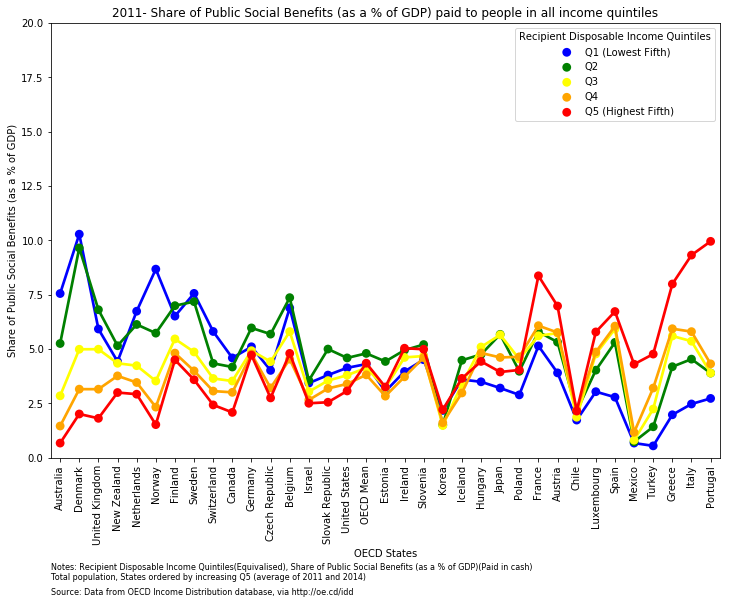

In [134]:
share_label = "Share of Public Social Benefits (as a % of GDP)"
relative_to_GDP = True

year = "2011"
show_all_quintiles = True
diff = False
figsize = (12,8)
plot_fn = sns.pointplot

plot_script()

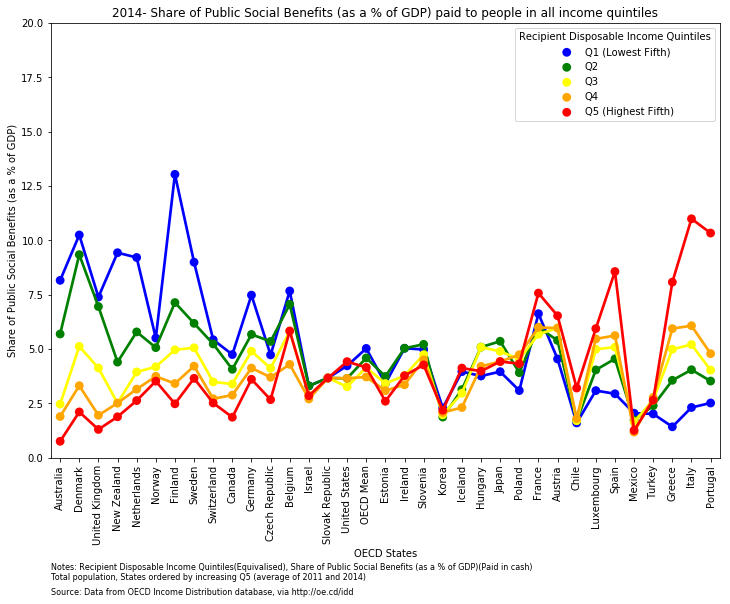

In [133]:
share_label = "Share of Public Social Benefits (as a % of GDP)"
relative_to_GDP = True

year = "2014"
show_all_quintiles = True
diff = False
figsize = (12,8)
plot_fn = sns.pointplot

plot_script()

In [131]:
BES_publications_OECD_SE

'../BES_analysis_publications/\\OECD_Social_Expenditure\\'